In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Load Dataset
df=pd.read_excel("/content/World_development_mesurement.xlsx")

In [3]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [4]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [5]:
df.tail()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"
2703,0.011,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,NaN,1,0.206,0.641,0.152,105275,0.949,NaN,NaN


In [6]:
df.ndim

2

In [7]:
df.shape
display(df.shape)

(2704, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [9]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [10]:
df = df.drop_duplicates()   # DROPS IF THERE ANY DUPLICATES

In [11]:
#Missing Value Analysis
df.isnull().sum()

,0
Birth Rate,119
Business Tax Rate,1281
CO2 Emissions,579
Country,0
Days to Start Business,986
Ease of Business,2519
Energy Usage,919
GDP,210
Health Exp % GDP,309
Health Exp/Capita,309


Visualizing Missing Values


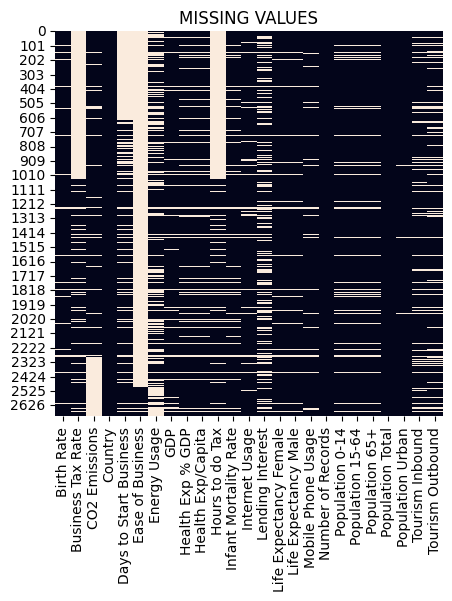

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),cbar=False)
plt.title("MISSING VALUES")
plt.show()

In [13]:
df = df.drop(['Ease of Business'], axis=1)

In [14]:
#Clean Currency Columns
clean_cols=['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']
for col in clean_cols:
  df[col]=(
      df[col]
      .astype(str)
      .str.replace(",","",regex=False)
      .str.replace("$","",regex=False))
  df[col]=pd.to_numeric(df[col],errors="coerce")

In [15]:
# Percentage Columns
percent_cols = ['Business Tax Rate']
for col in percent_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace("%", "", regex=False)
        .str.strip()
        .replace(["", "nan", "None"], np.nan)
    )
    df[col] = pd.to_numeric(df[col], errors='coerce') / 100

In [16]:
#Impute Missing Values
num_col = df.select_dtypes(include=[np.number]).columns
df[num_col] = df[num_col].fillna(df[num_col].median())


In [17]:
cat_col=df.select_dtypes(include=["object"]).columns
for col in cat_col:
  df[col]=df[col].fillna(df[col].mode()[0])

In [18]:
df.isnull().sum()

,0
Birth Rate,0
Business Tax Rate,0
CO2 Emissions,0
Country,0
Days to Start Business,0
Energy Usage,0
GDP,0
Health Exp % GDP,0
Health Exp/Capita,0
Hours to do Tax,0


In [19]:
df.dtypes

,0
Birth Rate,float64
Business Tax Rate,float64
CO2 Emissions,float64
Country,object
Days to Start Business,float64
Energy Usage,float64
GDP,float64
Health Exp % GDP,float64
Health Exp/Capita,float64
Hours to do Tax,float64


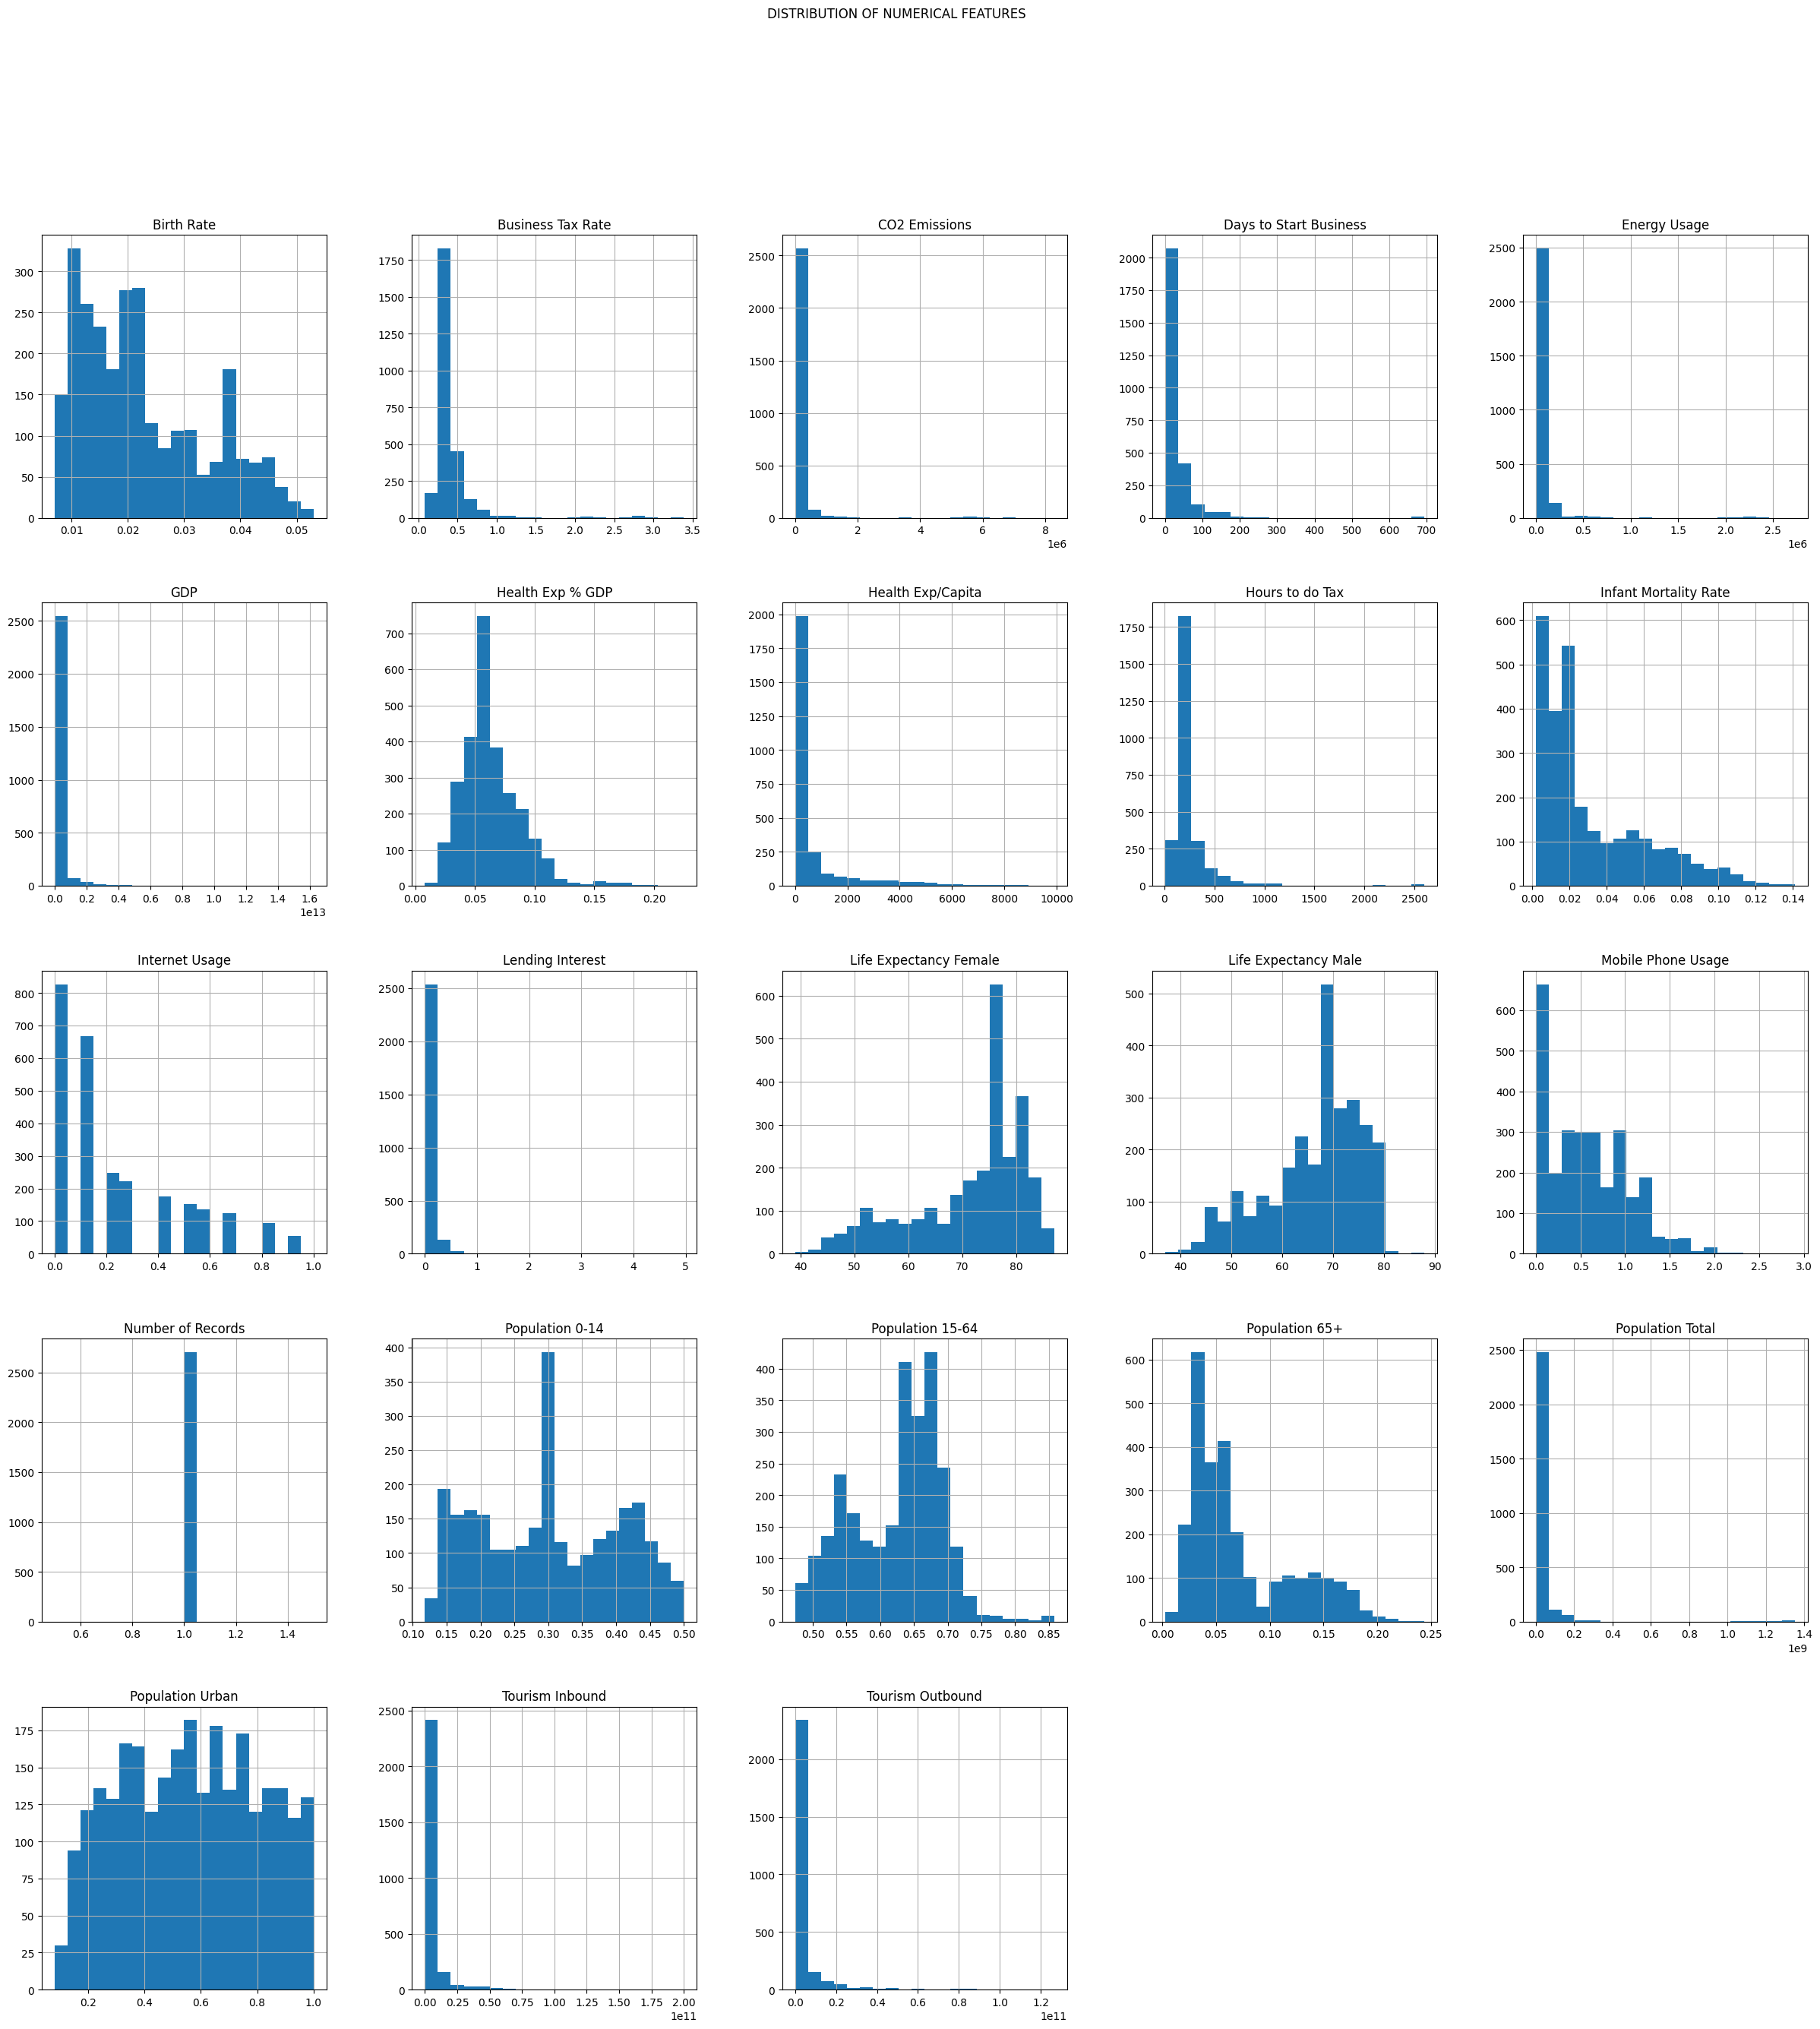

In [20]:
#Distribution of Numeric Variables
df[num_col].hist(figsize=(30,30),bins=20)
plt.suptitle("DISTRIBUTION OF NUMERICAL FEATURES")
plt.show()

In [21]:
skewness = df.skew(numeric_only=True)
kurtosis = df.kurtosis(numeric_only=True)

In [22]:
skewness

,0
Birth Rate,0.706320
Business Tax Rate,6.196858
CO2 Emissions,9.768254
Days to Start Business,9.354557
Energy Usage,8.729623
GDP,9.809793
Health Exp % GDP,1.293975
Health Exp/Capita,3.047889
Hours to do Tax,6.413322
Infant Mortality Rate,1.195218


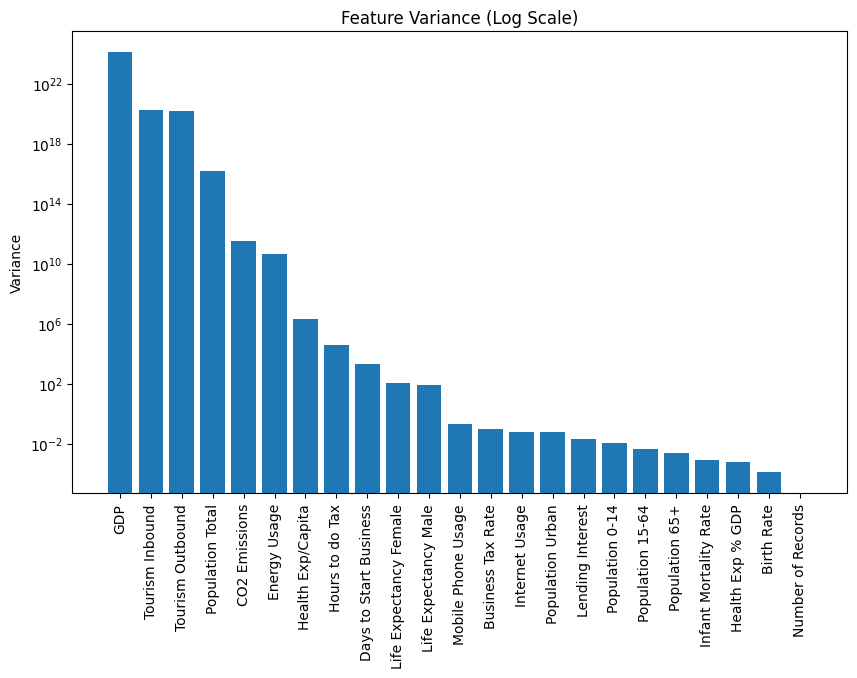

In [23]:
#FEATURE VARIANCE ANALYSIS
# Understanding spread of data
variance_df = pd.DataFrame(df[num_col].var().sort_values(ascending=False), columns=['Variance'])
plt.figure(figsize=(10, 6))
plt.bar(variance_df.index, variance_df['Variance'])
plt.yscale('log')                                        #Log scale for visibility
plt.xticks(rotation=90)
plt.title("Feature Variance (Log Scale)")
plt.ylabel("Variance")
plt.show()

In [27]:
# Top 5 High Variance Features
variance_df.sort_values(by="Variance", ascending=False).head(5)



,Variance
GDP,1.181944e+24
Tourism Inbound,1.678556e+20
Tourism Outbound,1.479869e+20
Population Total,1.544785e+16
CO2 Emissions,3.011179e+11


In [28]:
# Bottom 5 Low Variance Features
variance_df.sort_values(by="Variance", ascending=True).head(5)


,Variance
Number of Records,0.000000
Birth Rate,0.000123
Health Exp % GDP,0.000615
Infant Mortality Rate,0.000826
Population 65+,0.002289


Text(0, 0.5, 'Frequency')

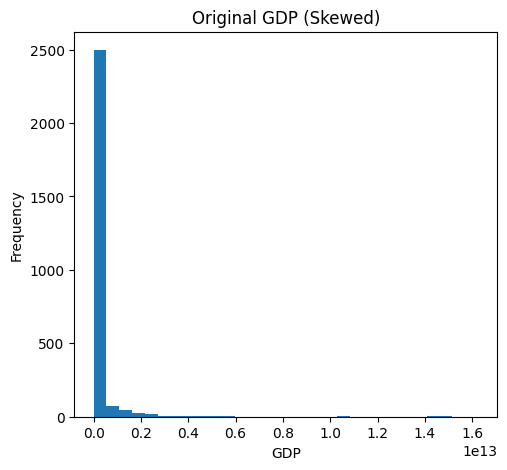

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df['GDP'], bins=30)
plt.title("Original GDP (Skewed)")
plt.xlabel("GDP")
plt.ylabel("Frequency")

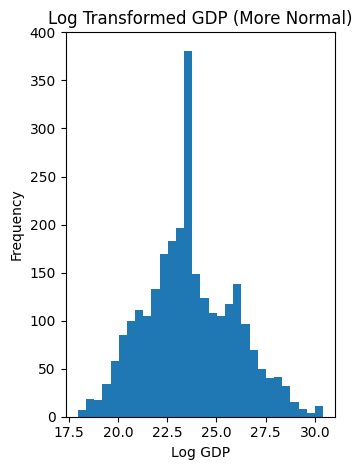

In [29]:
# Apply Log Transformation
df['Log_GDP'] = np.log1p(df['GDP'])
plt.subplot(1,2,2)
plt.hist(df['Log_GDP'], bins=30)
plt.title("Log Transformed GDP (More Normal)")
plt.xlabel("Log GDP")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

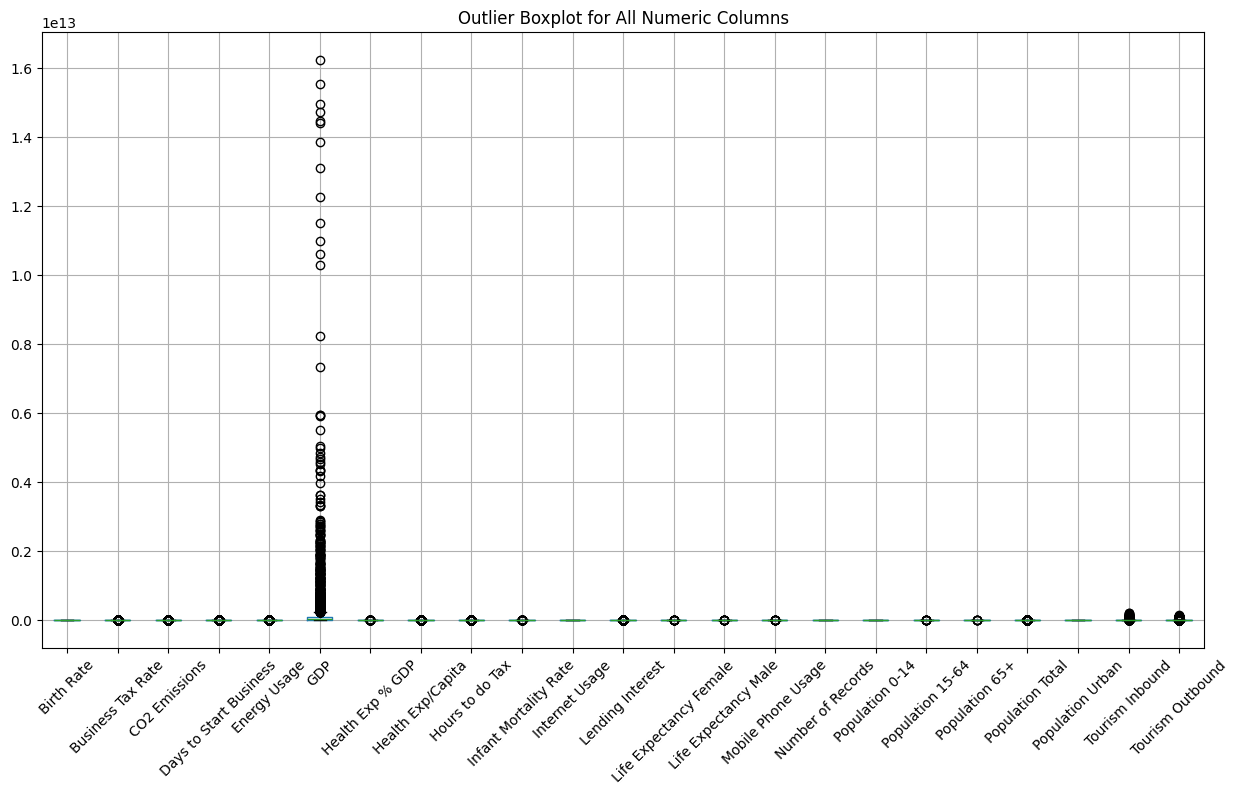

In [31]:
# Boxplot
plt.figure(figsize=(15,8))
df[num_col].boxplot(rot=45)
plt.title("Outlier Boxplot for All Numeric Columns")
plt.show()


In [34]:
#IQR OUTLIER CAPPING
def cap_outliers_iqr(df, columns):
    df_capped = df.copy()  # Work on a copy

    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap lower and upper values
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

    return df_capped

In [35]:
df = cap_outliers_iqr(df, num_col)

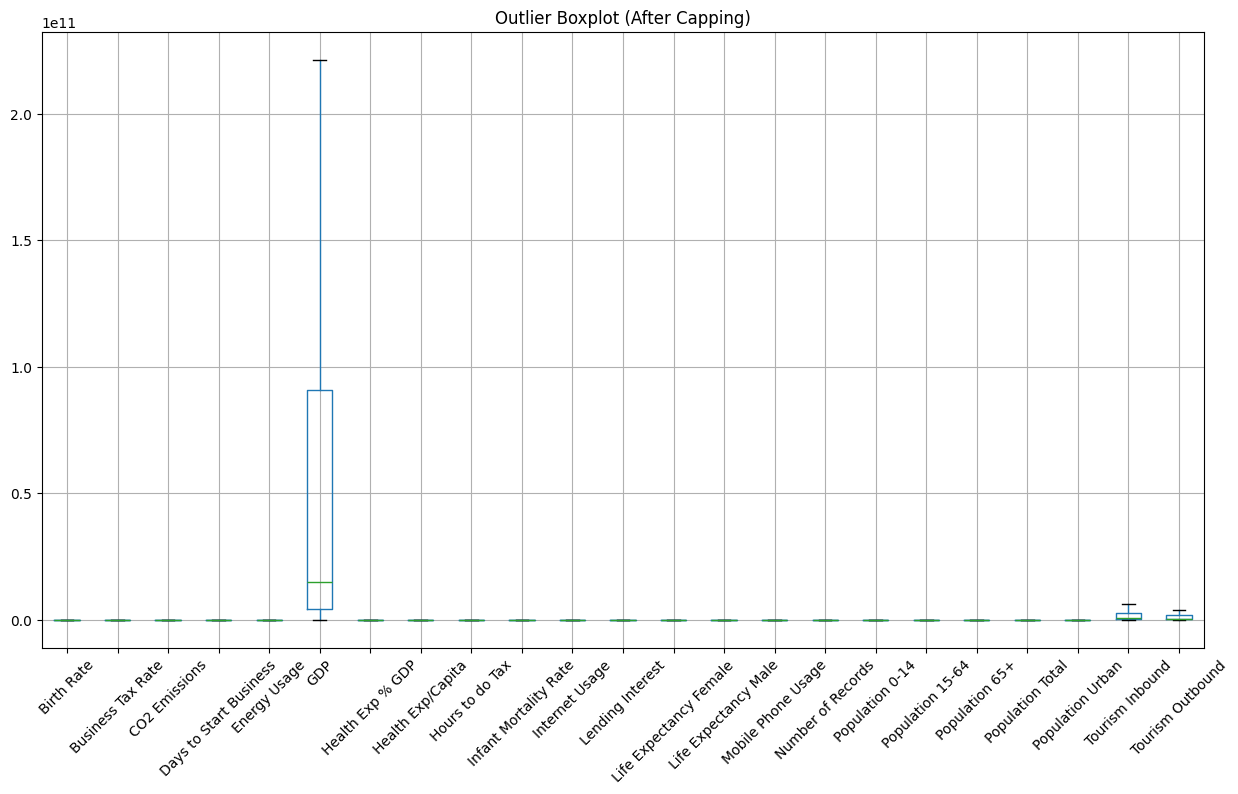

In [36]:
#Boxplot AFTER Capping
plt.figure(figsize=(15, 8))
df[num_col].boxplot(rot=45)
plt.title("Outlier Boxplot (After Capping)")
plt.show()

BIVARIATE ANALYSIS


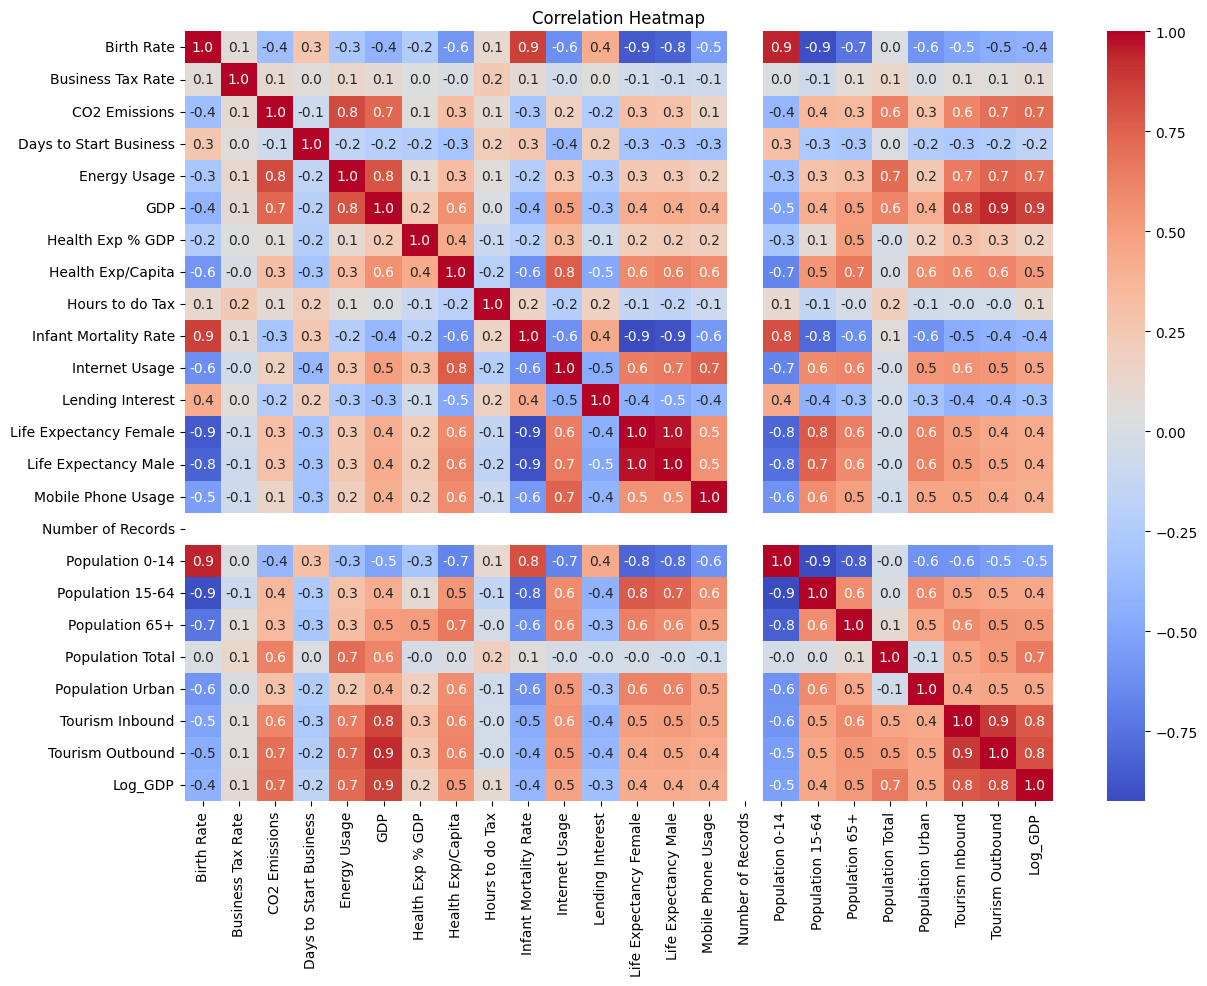

In [37]:
# Correlation Heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True,fmt=".1f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [41]:
#PAIRPLOT & SCATTER PLOTS

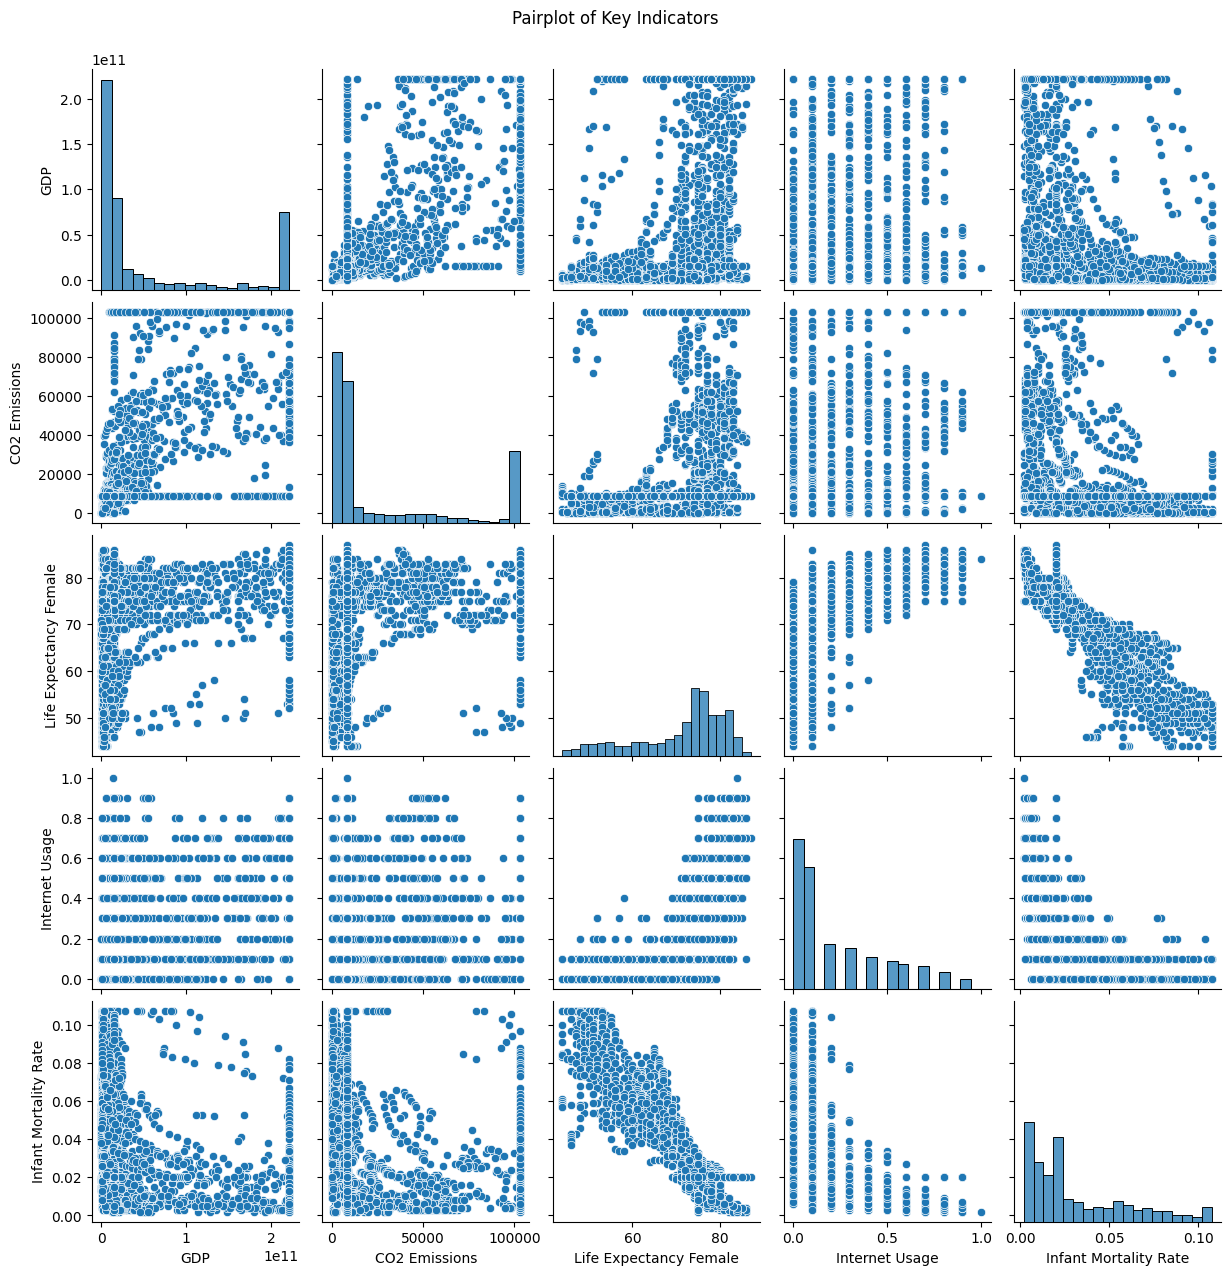

In [40]:
key_vars = ['GDP', 'CO2 Emissions', 'Life Expectancy Female', 'Internet Usage', 'Infant Mortality Rate']
sns.pairplot(df[key_vars])
plt.suptitle("Pairplot of Key Indicators", y=1.02)
plt.show()

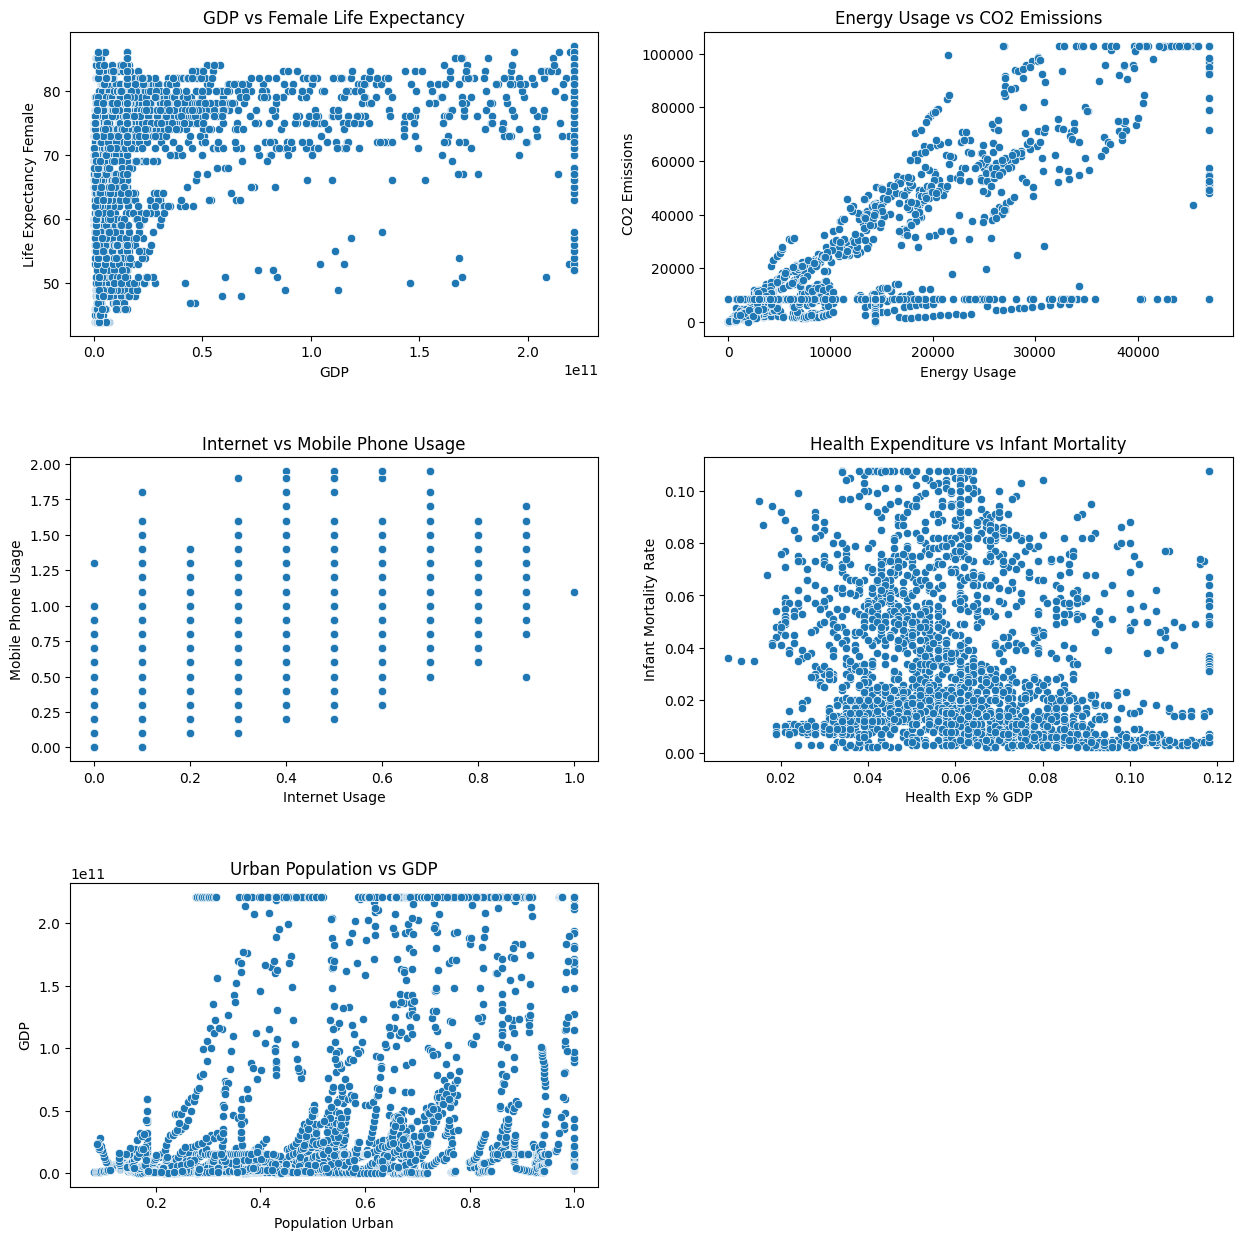

In [56]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4)
# Plot 1
sns.scatterplot(data=df, x='GDP', y='Life Expectancy Female', ax=axes[0, 0])
axes[0, 0].set_title('GDP vs Female Life Expectancy')
# Plot 2
sns.scatterplot(data=df, x='Energy Usage', y='CO2 Emissions', ax=axes[0, 1])
axes[0, 1].set_title('Energy Usage vs CO2 Emissions')
# Plot 3
sns.scatterplot(data=df, x='Internet Usage', y='Mobile Phone Usage', ax=axes[1, 0])
axes[1, 0].set_title('Internet vs Mobile Phone Usage')
# Plot 4
sns.scatterplot(data=df, x='Health Exp % GDP', y='Infant Mortality Rate', ax=axes[1, 1])
axes[1, 1].set_title('Health Expenditure vs Infant Mortality')
# Plot 5
sns.scatterplot(data=df, x='Population Urban', y='GDP', ax=axes[2, 0])
axes[2, 0].set_title('Urban Population vs GDP')
fig.delaxes(axes[2, 1])# Remove empty subplot
plt.show()

SCALING USING STANDARD SCALER

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
scaled_data = scaler.fit_transform(df[num_col].fillna(0))

In [60]:
df_scaled = pd.DataFrame(scaled_data, columns=num_col)

In [61]:
df_scaled

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,-0.233864,-0.064792,1.659733,-0.151075,0.590969,-0.060055,-1.266291,-0.746454,-0.048822,0.092012,...,0.043864,-1.253652,0.0,0.384182,-0.089411,-0.684821,1.090800,0.147449,-0.754222,-0.670804
1,2.469335,-0.064792,-0.486142,-0.151075,-0.729010,-0.620533,-1.311467,-0.831569,-0.048822,2.697530,...,-2.472735,-1.253652,0.0,1.696192,-1.886942,-0.978160,0.021270,-0.976530,-0.783976,-0.702383
2,1.838589,-0.064792,-0.703087,-0.151075,-1.102414,-0.703641,-0.904880,-0.847248,-0.048822,2.077168,...,-1.487979,-1.253652,0.0,1.480788,-1.617312,-0.894348,-0.397993,-0.735385,-0.765161,-0.766886
3,0.396882,-0.064792,-0.630298,-0.151075,-1.112365,-0.661547,-0.724175,-0.540387,-0.048822,0.800996,...,-1.925648,-1.034604,0.0,0.785618,-0.568753,-0.894348,-0.710175,-0.126393,-0.699527,-0.660053
4,2.108909,-0.064792,-0.718855,-0.151075,-0.266046,-0.700549,-0.543469,-0.853967,-0.048822,2.289864,...,-1.925648,-1.253652,0.0,1.617863,-1.797065,-0.915301,-0.117991,-1.573260,-0.788789,-0.780324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,-0.233864,-0.064792,-0.513873,-0.151075,-0.266046,-0.547496,-0.091706,-0.448553,-0.048822,-0.404277,...,0.262699,-0.158413,0.0,-0.031941,0.262605,-0.412434,-0.813732,1.422654,-0.497594,-0.494092
2700,-0.864611,1.549489,-0.513873,-1.633604,1.939152,1.984763,2.483345,2.011093,-1.486296,-0.900566,...,1.028620,0.936826,0.0,-1.045322,0.629601,1.347600,2.131526,1.013934,1.975703,1.926279
2701,-0.684397,0.285293,-0.513873,-1.492411,-0.266046,-0.118799,1.173232,2.011093,1.607557,-0.758769,...,0.809785,2.032065,0.0,-0.810335,0.210177,1.431411,-0.611611,1.573880,0.173401,-0.109762
2702,-0.233864,1.549489,-0.513873,1.940350,-0.266046,1.984763,-0.769351,0.447391,1.607557,-0.652422,...,0.590951,0.936826,0.0,-0.144539,0.404910,-0.244812,0.984736,1.332735,-0.403301,1.350960


PCA


In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)   # Keep 95% of the variance
pca_data = pca.fit_transform(df_scaled)


In [66]:
print("Number of PCA Components:", pca.n_components_)
print("Total Explained Variance:", round(np.sum(pca.explained_variance_ratio_), 2))


Number of PCA Components: 13
Total Explained Variance: 0.96


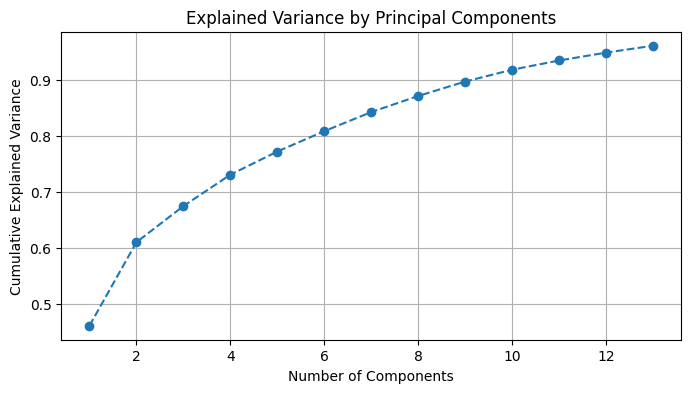

In [67]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [69]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=num_col)  ## Top Features for PC1
print("Top 5 Features contributing to PC1:\n", loadings['PC1'].abs().sort_values(ascending=False).head(5))

Top 5 Features contributing to PC1:
 Population 0-14           0.284450
Birth Rate                0.271211
Life Expectancy Female    0.267718
Life Expectancy Male      0.265290
Infant Mortality Rate     0.262607
Name: PC1, dtype: float64
